In [2]:
using StatsBase
using Plots
using JLD2

In [3]:
function initialstate(L::Int)
    ρ = zeros(Bool,L,L)
    return ρ
end

function noiselayer(ρ::AbstractMatrix, p::Float64)
    L = size(ρ)[1]
    noise = rand(L,L) .< p
    return ρ .⊻ noise
end

function magnetization(ρ::AbstractMatrix)
    return mean(ρ)
end

magnetization (generic function with 1 method)

In [4]:
function measure(ρ::AbstractMatrix, q::Float64)
    vertical_checks = noiselayer(ρ .⊻ circshift(ρ,(-1,0)),q)
    horizontal_checks = noiselayer(ρ .⊻ circshift(ρ,(0,-1)),q)
    return vertical_checks, horizontal_checks
end

function toom(ρ::AbstractMatrix, checks::Tuple)
    vertical_checks, horizontal_checks = checks
    ρ = ρ .⊻ (vertical_checks .& horizontal_checks)
    return ρ
end

toom (generic function with 1 method)

In [63]:
function ising_energy(ρ::AbstractMatrix)
    vertical_checks, horizontal_checks = measure(ρ, 0.0)
    return sum(vertical_checks) + sum(horizontal_checks)
end

ising_energy (generic function with 1 method)

In [5]:
samples = 10000
L = 10
ρs = zeros(samples,L,L)

t = time()

T = 10L
p = 0.1
q = p
for sample in 1:samples
    ρ = zeros(Bool,L,L)

    for t in 1:T
        ρnew = noiselayer(ρ, p)
        ρ = toom(ρnew, measure(ρnew, q))
    end

    ρs[sample,:,:] = ρ
end

# data1[(L,p)] = 1 - mean(ρs)
println(mean((1 .- 2ρs).*(1 .- 2circshift(ρs,(0,L÷2,L÷2)))) - mean(mean(1 .- 2ρs, dims=1) .* mean(1 .- 2circshift(ρs,(0,L÷2,L÷2)),dims=1)))


println(time()-t)

0.011936600799999999
3.6967921257019043


In [44]:
data = Dict{Tuple{Float64,Float64},Array}()
data2 = Dict{Tuple{Float64,Float64},Array}()

Dict{Tuple{Float64, Float64}, Array}()

In [7]:
# toom1 = Dict{Tuple{Float64,Float64},Vector}()
# toom2 = Dict{Tuple{Float64,Float64},Vector}()

In [270]:
# jldsave("toom.jld2"; toom1, toom2)

In [11]:
data = load("toom.jld2")
toom1 = data["toom1"]
toom2 = data["toom2"]

Dict{Tuple{Float64, Float64}, Vector} with 404 entries:
  (12.0, 0.079) => [1.0, 0.844724, 0.755207, 0.693158, 0.644213, 0.603257, 0.56…
  (12.0, 0.015) => [1.0, 0.993131, 0.991968, 0.991558, 0.991525, 0.991497, 0.99…
  (16.0, 0.087) => [1.0, 0.814779, 0.708122, 0.631933, 0.57184, 0.521948, 0.479…
  (20.0, 0.07)  => [1.0, 0.872657, 0.804508, 0.75548, 0.717817, 0.686315, 0.660…
  (12.0, 0.052) => [1.0, 0.9269, 0.890109, 0.868184, 0.854209, 0.842028, 0.8338…
  (16.0, 0.057) => [1.0, 0.912742, 0.868753, 0.840918, 0.820273, 0.803351, 0.79…
  (20.0, 0.01)  => [1.0, 0.996937, 0.99642, 0.996399, 0.99653, 0.996388, 0.9962…
  (16.0, 0.068) => [1.0, 0.880199, 0.815445, 0.769691, 0.735457, 0.707435, 0.68…
  (20.0, 0.012) => [1.0, 0.995555, 0.994839, 0.994745, 0.994571, 0.994694, 0.99…
  (8.0, 0.044)  => [1.0, 0.945859, 0.923071, 0.909119, 0.899755, 0.895824, 0.89…
  (20.0, 0.071) => [1.0, 0.870628, 0.799089, 0.749123, 0.709131, 0.676883, 0.65…
  (20.0, 0.082) => [1.0, 0.834238, 0.738494, 0.669848

In [12]:
for L in 8:4:20
    for p in 0.0:0.001:0.1
        toom1[(L,p)] = (1 .- 2mean(data[(L,p)],dims=(1,3,4)))[1,:,1,1]
        toom2[(L,p)] = mean((1 .- 2mean(data[(L,p)],dims=(3,4))) .^ 2, dims=1)[1,:,1,1]
    end
end

LoadError: KeyError: key (8, 0.0) not found

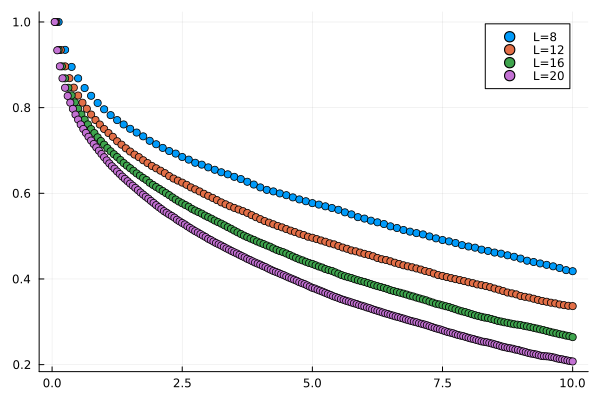

In [43]:
plt = plot()
p = 0.07
for L in 8:4:20
    T = 10L
    xs = collect(1:T)/L
    ys = toom1[(L,p)]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

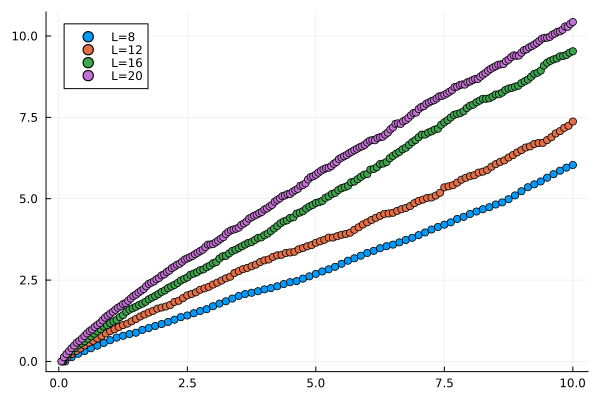

In [35]:
plt = plot()
p = 0.06
for L in 8:4:20
    T = 10L
    xs = collect(1:T)/L
    ys = toom2[(L,p)] - toom1[(L,p)] .^ 2
    plot!(plt, xs, L^2*ys, seriestype=:scatter, label="L=$L")
end
plt

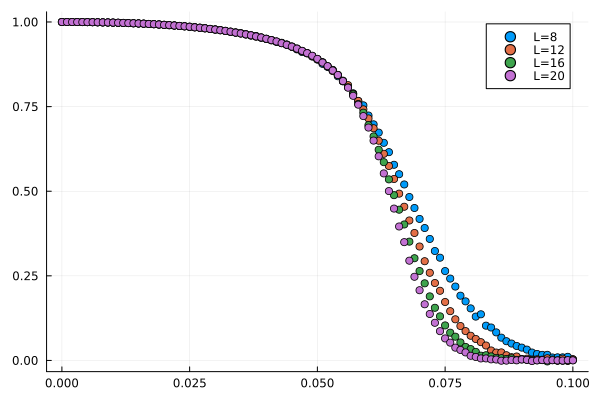

In [42]:
plt = plot()
for L in 8:4:20
    T = 10L
    xs = 0.0:0.001:0.1
    ys = [toom1[(L,p)][end] for p in xs]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

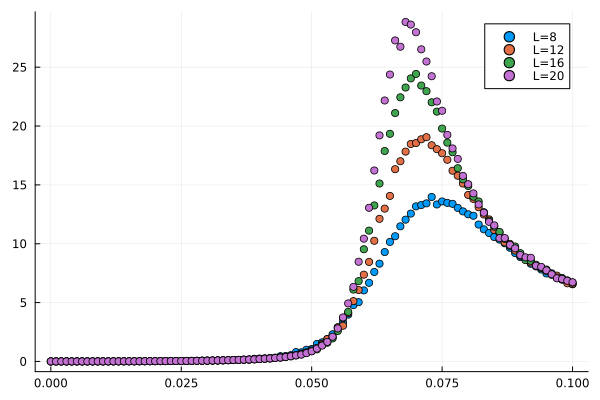

In [29]:
plt = plot()
for L in 8:4:20
    T = 10L
    xs = 0.0:0.001:0.1
    ys = [toom2[(L,p)][end]-toom1[(L,p)][end]^2 for p in xs]
    plot!(plt, xs, L^2*ys, seriestype=:scatter, label="L=$L")
end
plt

In [239]:
jldsave("cold_toom.jld2"; data)

LoadError: InterruptException:

In [64]:
for p in [0.05]
    println(p)
for L in [8]
    T = 10L
    samples = 100000
    q = p
    data[(L,p)] = zeros(Bool,samples,T,L,L)

    τ = time()
    for sample in 1:samples
        ρ = zeros(Bool,L,L)
        data[(L,p)][sample,1,:,:] = ρ

        for t in 2:T
            ρnew = noiselayer(ρ, p)
            ρ = toom(ρnew, measure(ρnew, q))
            data[(L,p)][sample,t,:,:] = ρ
        end
    end
    println(time()-τ)
end
end

0.05
44.12006998062134


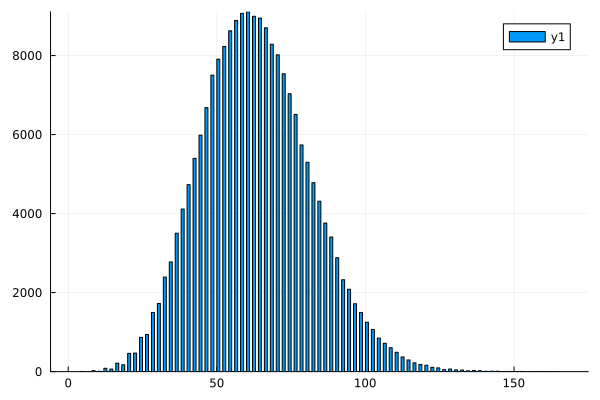

In [135]:
L = 20
p = 0.05
# histogram([ising_energy(data[(L,p)][s,end,:,:]) for s in 1:10000])#, yscale=:log10)#, bins=0:1:150)
histogram([ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000])#, yscale=:log10)#, bins=0:1:150)

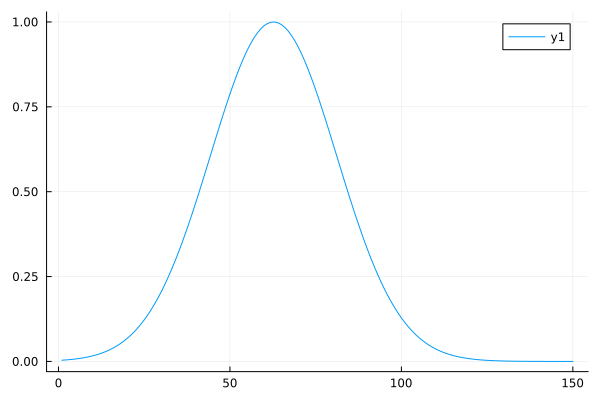

In [151]:
σ = sqrt(var([ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000]))
E0 = mean([ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000])
f(E) = exp(-(E-E0)^2/(2σ^2))
plot(1:150, [f(E) for E in 1:150])

In [154]:
h = fit(Histogram, [ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000], nbins=100)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  4.0:2.0:166.0
weights: [5, 0, 24, 9, 84, 64, 212, 172, 462, 468  …  4, 5, 1, 4, 1, 3, 1, 1, 0, 3]
closed: left
isdensity: false

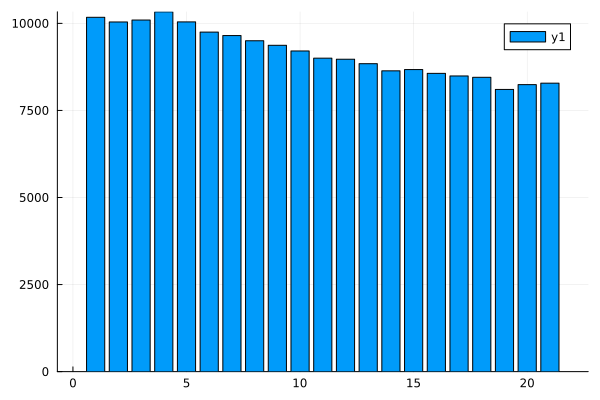

In [175]:
bar([h.weights[i]/f(h.edges[1][i]) for i in 20:40])

In [150]:
4*2^(L^2)/sqrt(2π*σ^2) * 

0.0

In [140]:
sqrt(var([ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000]))

18.397759767121638

In [141]:
mean([ising_energy(data[(L,p)][s,t,:,:]) for t in 9L:10L for s in 1:10000])

62.71233333333333

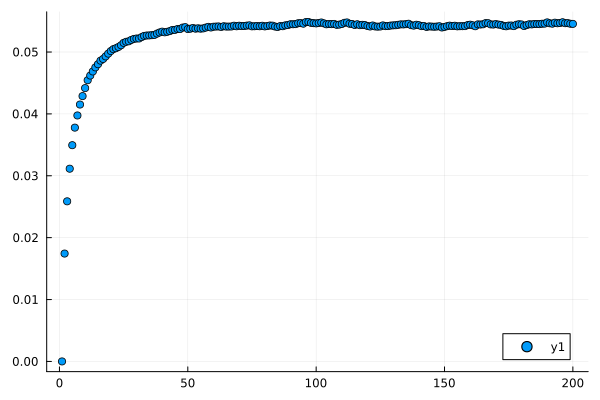

In [124]:
L = 20
plot([mean(data[(L,p)][:,t,:,:]) for t in 1:10L], seriestype=:scatter)

In [99]:
max(unique([ising_energy(data[(L,p)][s,end,:,:]) for s in 1:10000])...)

148

In [58]:
[ising_energy(data[(L,p)][s,end,:,:]) for s in 1:samples]

100000-element Vector{Int64}:
 108
  84
 100
 120
 112
 128
 112
 112
 112
 112
 112
 128
  96
   ⋮
 120
 116
 112
 120
 128
 120
 128
 120
 112
 112
 120
 112

In [206]:
# for L in 8:4:20
#     T = 10L
#     samples = 10000
#     p = 0.055
#     q = p
#     data2[(L,p)] = zeros(Bool,samples,T,L,L)

#     τ = time()
#     for sample in 1:samples
#         ρ = rand(Bool,L,L)
#         data2[(L,p)][sample,1,:,:] = ρ

#         for t in 2:T
#             ρnew = noiselayer(ρ, p)
#             ρ = toom(ρnew, measure(ρnew, q))
#             data2[(L,p)][sample,t,:,:] = ρ
#         end
#     end
#     println(time()-τ)
# end

4.070724010467529
7.803424119949341
16.366556882858276
25.568495988845825


In [15]:
plt = plot()
p = 0.1
for L in 8:4:20
    T = 10L
    xs = collect(1:T)/L
    ys = [1 - 2mean(data[(L,p)][:,t,:,:]) for t in 1:T]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

LoadError: KeyError: key (8, 0.1) not found

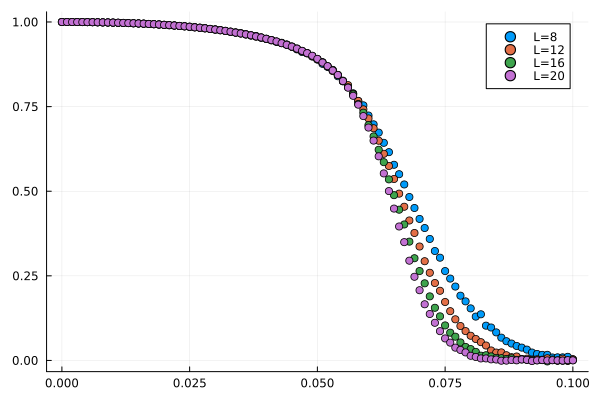

In [246]:
plt = plot()
for L in 8:4:20
    T = 10L
    xs = 0.0:0.001:0.1
    ys = [(1 - 2mean(data[(L,p)][:,end,:,:])) for p in xs]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

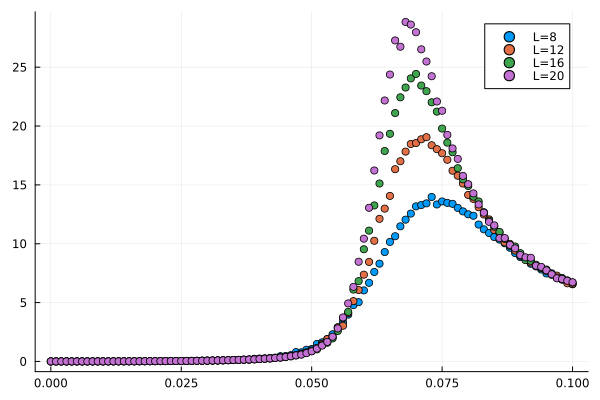

In [247]:
plt = plot()
for L in 8:4:20
    T = 10L
    xs = 0.0:0.001:0.1
    ys1 = [mean((1 .- 2mean(data[(L,p)][:,end,:,:],dims=(2,3))) .^ 2) for p in xs]
    ys2 = [(1 - 2mean(data[(L,p)][:,end,:,:]))^2 for p in xs]
    plot!(plt, xs, L^2*(ys1-ys2), seriestype=:scatter, label="L=$L")
end
plt

In [211]:
mean((1 .- 2mean(data[(20,p)][:,end,:,:],dims=(2,3))) .^ 2)

0.6883752000000004

In [212]:
(1 - 2mean(data[(20,p)][:,end,:,:]))^2

0.681362749809

In [196]:
mean((1 .- 2mean(data2[(20,p)][:,t,:,:],dims=(2,3))) .^ 2)

0.5717627250000004

In [197]:
(1 - 2mean(data2[(20,p)][:,end,:,:]))^2

6.220035999999981e-6

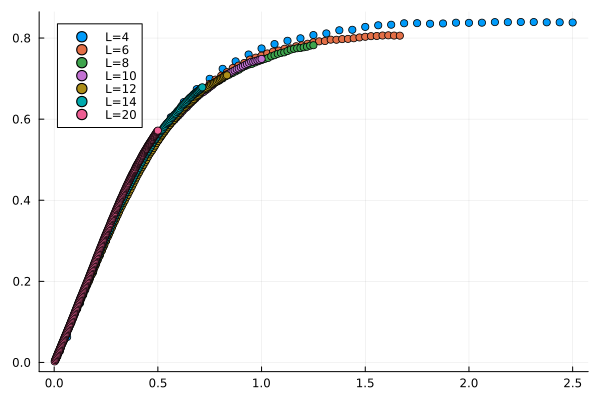

In [200]:
plt = plot()
p = 0.05
for L in union(4:2:14,[20])
    T = 10L
    xs = collect(1:T)/L^2
    ys = [mean((1 .- 2mean(data2[(L,p)][:,t,:,:],dims=(2,3))).^2) for t in 1:T]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

In [170]:
a = zeros(2,2,2,2)
a[1,1,1,1] = 1
a[2,2,2,2] = 1
mean(a[:,1,:,:],dims)

2×2×2 Array{Float64, 3}:
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  0.0

In [83]:
# data1 = Dict{Tuple{Float64,Float64},Float64}()
# data2 = Dict{Tuple{Float64,Float64},Float64}()

Dict{Tuple{Float64, Float64}, Float64}()

In [133]:
samples = 10000
L = 4
ρs = zeros(samples,L,L)

t = time()

T = 10L
for p in 0.05:0.005:0.07
    q = p
    for sample in 1:samples
        ρ = rand(Bool,L,L)

        for t in 1:T
            ρnew = noiselayer(ρ, p)
            ρ = toom(ρnew, measure(ρnew, q))
        end

        ρs[sample,:,:] = ρ
    end

    data1[(L,p)] = 1 - mean(ρs)
    data2[(L,p)] = mean((1 .- 2ρs).*(1 .- 2circshift(ρs,(0,L÷2,L÷2)))) - mean(mean(1 .- 2ρs, dims=1) .* mean(1 .- 2circshift(ρs,(0,L÷2,L÷2)),dims=1))
end

println(time()-t)

1.761441946029663


In [107]:
data2[(6,0.06)]

0.1048773822222222

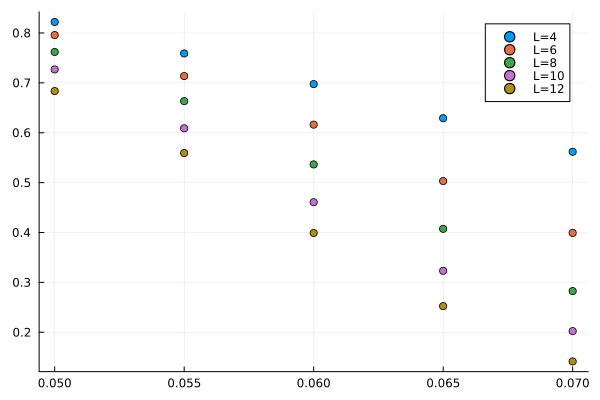

In [135]:
plt = plot()
for L in 4:2:12
    xs = 0.05:0.005:0.07
    ys = [data2[(L,p)] for p in xs]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

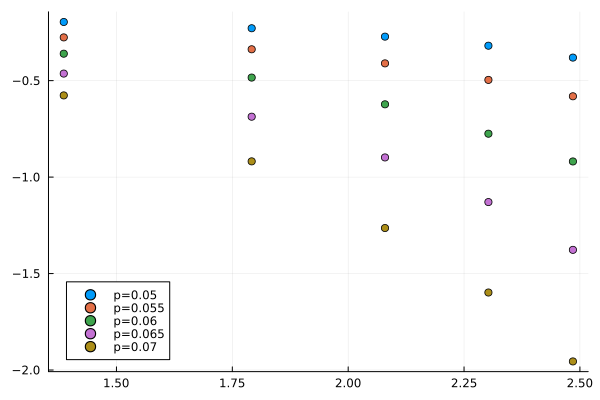

In [136]:
plt = plot()
for p in 0.05:0.005:0.07
    xs = 4:2:12
    ys = [data2[(L,p)] for L in xs]
    plot!(plt, log.(xs), log.(ys), seriestype=:scatter, label="p=$p")
end
plt

In [79]:
mean((1 .- 2ρs[:,1,1]).*(1 .- ρs[:,L÷2,L÷2]))  -   mean(1 .- 2ρs[:,1,1])*mean(1 .- ρs[:,L÷2,L÷2])

0.031138259999999973

In [41]:
mean((1 .- 2ρs[:,1,1]).*(1 .- ρs[:,L÷2,L÷2])) 

0.5096

In [42]:
mean(1 .- 2ρs[:,1,1])*mean(1 .- ρs[:,L÷2,L÷2])

0.4775152

In [39]:
1 - mean(ρs)

0.797157